## Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
data = pd.read_csv("C:\\Users\\Acer\\Downloads\\House_Pricing.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Duplicate Removal

In [6]:
# Checking Rows with duplicated values

data.duplicated().sum()

#data.drop_duplicates(inplace = True)
#data = data[~duplicated_rows]

0

##

In [7]:
# Checking Columns with duplicated values

data.columns.duplicated().sum()

0

## Handling Missing Values

In [8]:
#Checking Missing Values

data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [9]:
data.drop("ID", axis = 1,inplace = True)

In [10]:
data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

### Splitting Numerical & Categorical Columns

In [11]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object")

In [12]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

Numerical columns are
['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [13]:
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
['Date House was Sold', 'Waterfront View', 'No of Times Visited', 'Condition of the House']


### Check Histograms of Numerical columns for Data imputation

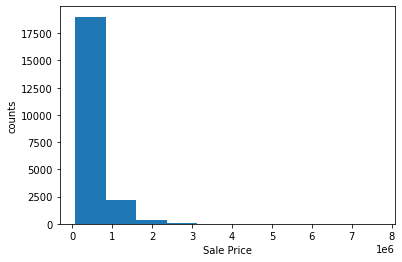

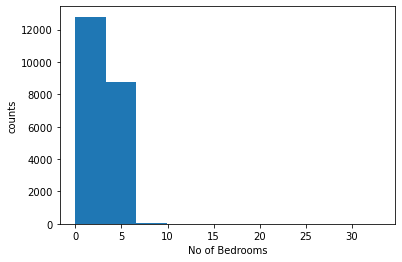

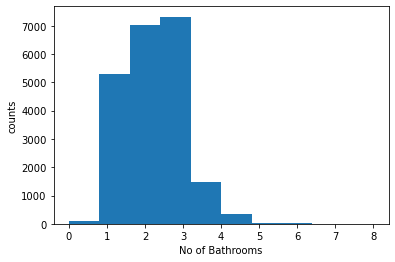

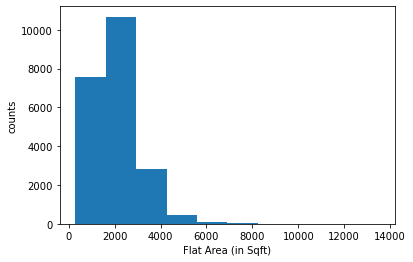

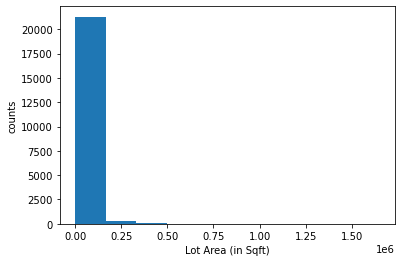

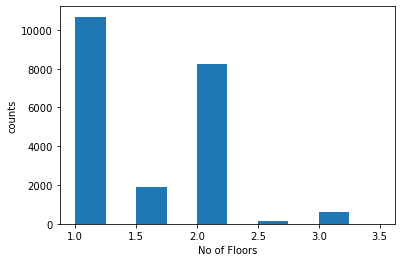

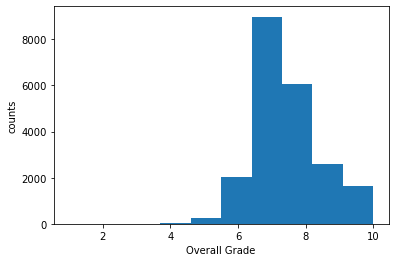

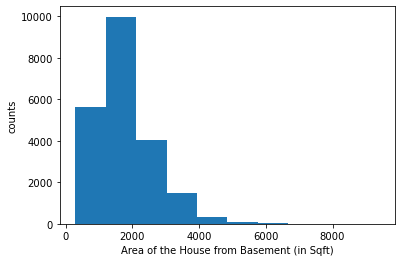

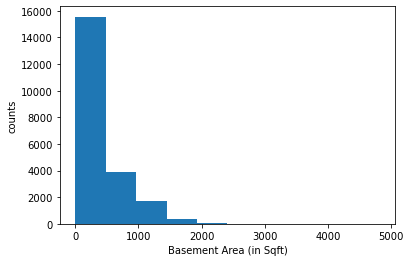

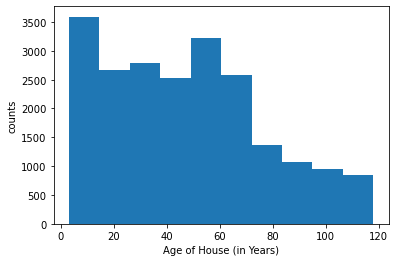

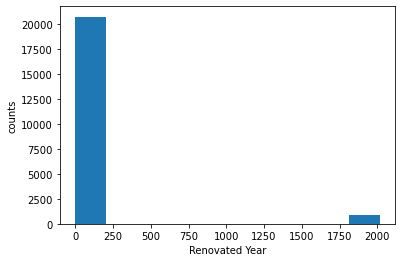

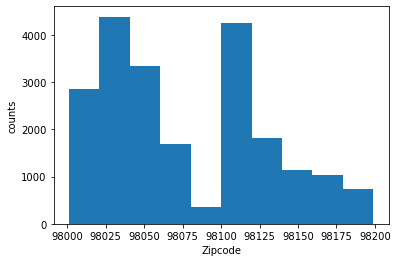

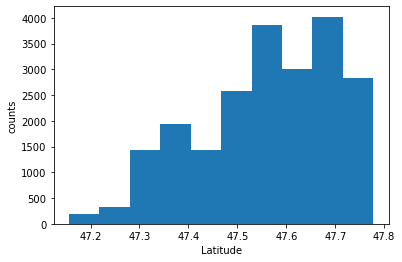

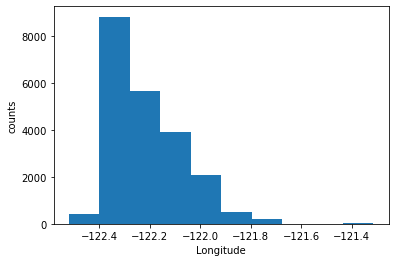

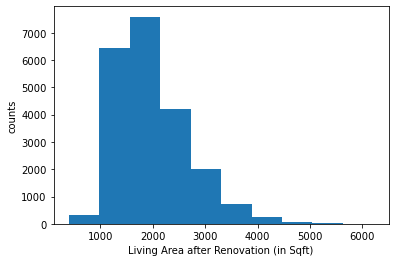

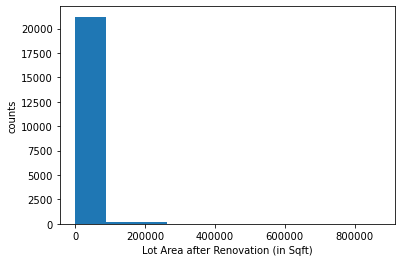

In [14]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show() 

**Insights**
- Sale price, No.of Bathrooms, Flat Area, Lot Area, Area of the House from Basement, Zipcode, Latitude, Longitude and Living Area after Renovation is having skewed distribution.So we can replace the missing values in sale price by median.

## Filling Missing values for numerical columns

In [15]:
#  Filling Missing values for numerical columns using median,since it is having skewed distribution.
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [16]:
num_df.isna().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

## Filling Missing values for Categorical columns
*For categorical values we use mode to fill missing values

In [17]:
cat_df.isna().sum()

Date House was Sold       0
Waterfront View           0
No of Times Visited       0
Condition of the House    0
dtype: int64

**Insights**
- This dataset doesn't contain missing values in categorical columns.

In [18]:
## Recombine both Numerical & Categorical columns

data = pd.concat([num_df,cat_df],axis = 1)
data.isna().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Date House was Sold                          0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
dtype: int64

## Encoding Categorical Variables

In [19]:
data["Date House was Sold"].unique()

array(['14 October 2017', '14 December 2017', '15 February 2016',
       '14 May 2017', '14 June 2017', '15 January 2016', '15 April 2016',
       '15 March 2016', '14 July 2017', '14 August 2017',
       '14 November 2017', '14 September 2017', '15 May 2016'],
      dtype=object)

In [20]:
#data['Date House was Sold'] = pd.to_datetime(data['Date House was Sold'])

In [21]:
# Extract year, month, and weekday as separate features

#data['Year Sold'] = data['Date House was Sold'].dt.year
#data['Month Sold'] = data['Date House was Sold'].dt.month
#data['Day of Week Sold'] = data['Date House was Sold'].dt.weekday
#data.head()

#data.drop('Date House was Sold', axis=1, inplace=True)


In [22]:
data.drop(['Date House was Sold'],axis = 1,inplace=True)

In [23]:
data["Waterfront View"].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [25]:
data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [26]:
#Ordinal encoding

Condition_of_the_House =  ['Bad','Okay','Good','Fair','Excellent']

ordinal_enc = OrdinalEncoder(categories = [Condition_of_the_House])
data['Condition_of_the_House_encoded'] = ordinal_enc.fit_transform(data[['Condition of the House']])
data.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,No of Times Visited,Condition of the House,Condition_of_the_House_encoded
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,None,Fair,3.0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No,None,Fair,3.0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,None,Fair,3.0


In [27]:
#Ordinal encoding

No_of_Times_Visited =  ['None','Once','Twice','Thrice','Four']

ordinal_enc = OrdinalEncoder(categories = [No_of_Times_Visited])
data['No_of_Times_Visited_encoded'] = ordinal_enc.fit_transform(data[['No of Times Visited']])
data.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,No of Times Visited,Condition of the House,Condition_of_the_House_encoded,No_of_Times_Visited_encoded
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,98178.0,47.5112,-122.257,1340.0,5650,No,None,Fair,3.0,0.0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,98125.0,47.7210,-122.319,1690.0,7639,No,None,Fair,3.0,0.0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,98028.0,47.7379,-122.233,2720.0,8062,No,None,Fair,3.0,0.0


In [28]:
#One hot encoder

data = pd.get_dummies(data, columns =['Waterfront View'],prefix ='col', dtype = int)
data.head() 

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),No of Times Visited,Condition of the House,Condition_of_the_House_encoded,No_of_Times_Visited_encoded,col_No,col_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,47.5112,-122.257,1340.0,5650,None,Fair,3.0,0.0,1,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,47.7210,-122.319,1690.0,7639,None,Fair,3.0,0.0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,47.7379,-122.233,2720.0,8062,None,Fair,3.0,0.0,1,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,47.5208,-122.393,1360.0,5000,None,Excellent,4.0,0.0,1,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,47.6168,-122.045,1800.0,7503,None,Fair,3.0,0.0,1,0


In [29]:
data.drop(["Condition of the House","No of Times Visited"],axis=1 , inplace = True)

In [30]:
data.shape

(21613, 20)

In [31]:
data_encoded = data[['Condition_of_the_House_encoded','No_of_Times_Visited_encoded','col_No','col_Yes']]
data_encoded 

,Condition_of_the_House_encoded,No_of_Times_Visited_encoded,col_No,col_Yes
0,3.0,0.0,1,0
1,3.0,0.0,1,0
2,3.0,0.0,1,0
3,4.0,0.0,1,0
4,3.0,0.0,1,0
...,...,...,...,...
21608,3.0,0.0,1,0
21609,3.0,0.0,1,0
21610,3.0,0.0,1,0
21611,3.0,0.0,1,0


## Outlier Handling

In [32]:
num_df.head()  #---------->Numerical columns.

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


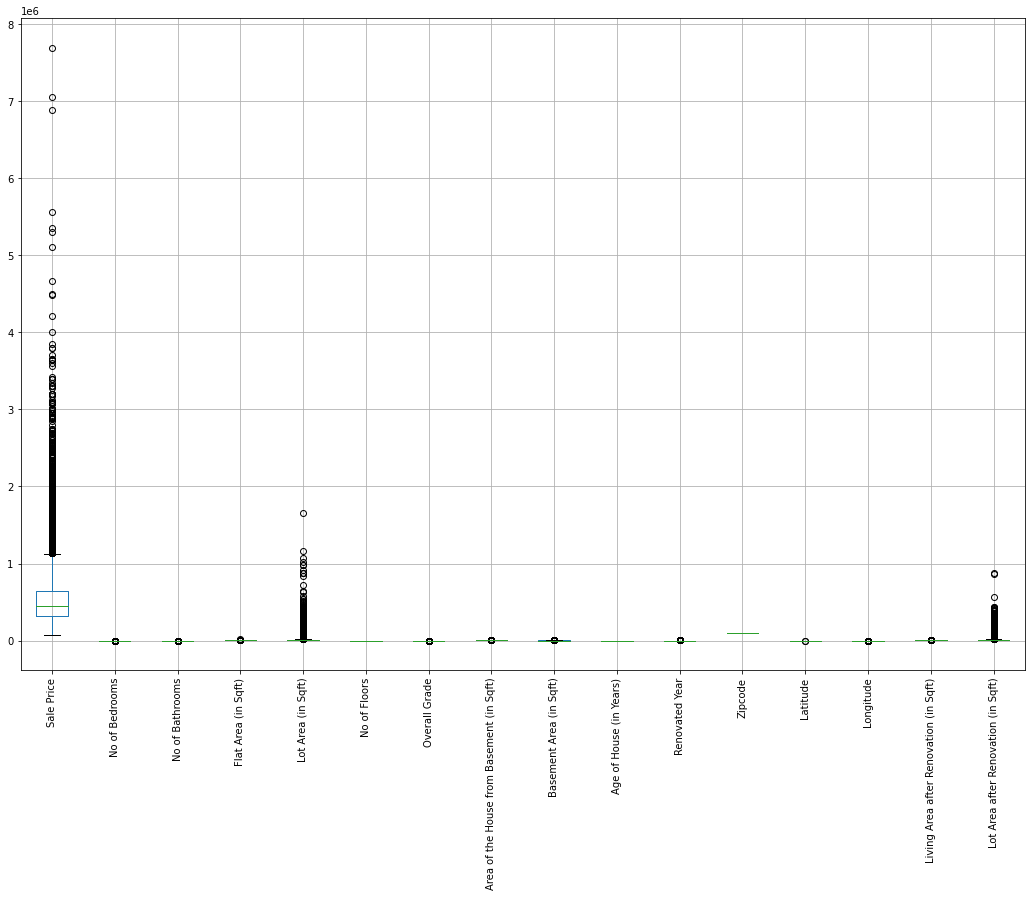

In [33]:
num_df.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

In [34]:
num_cols = num_df.columns.tolist()
print(num_cols)

['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [35]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

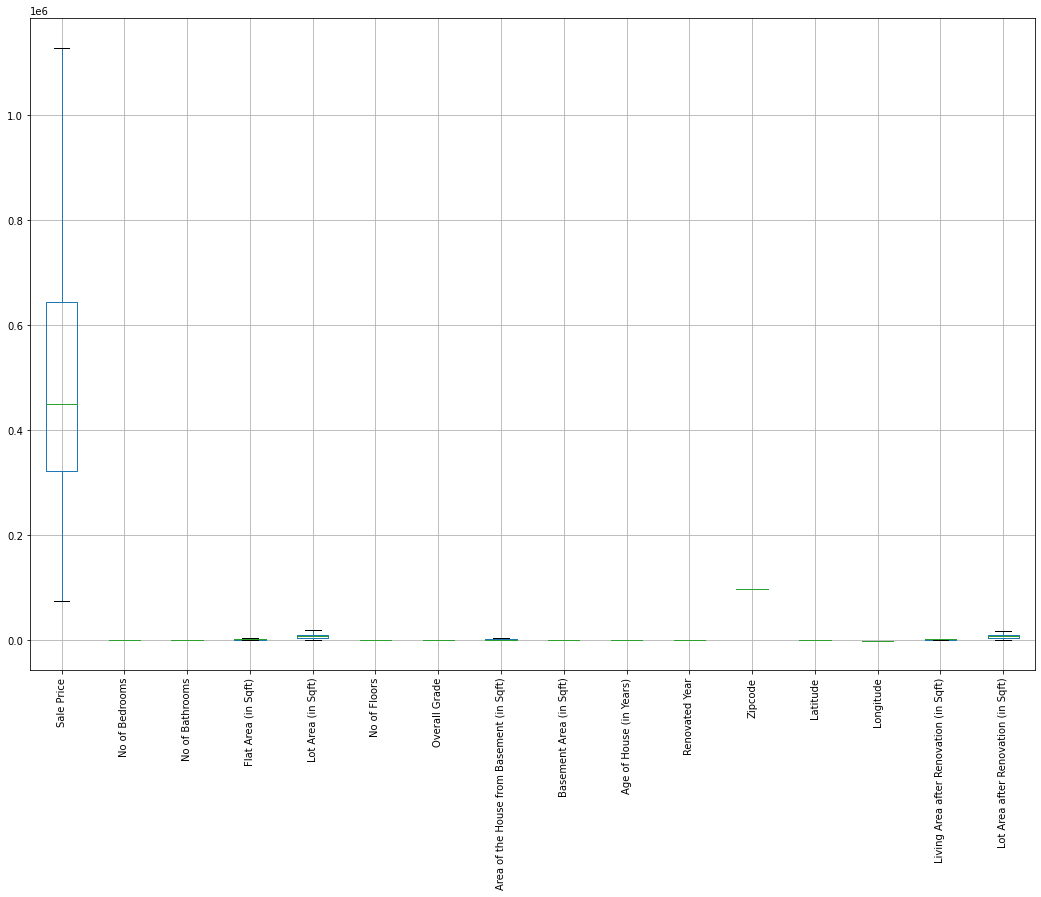

In [36]:
num_df.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

In [37]:
num_df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0.0,63,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400.0,67,0.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0.0,85,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910.0,53,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0.0,31,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


# Scaling Numerical Variables

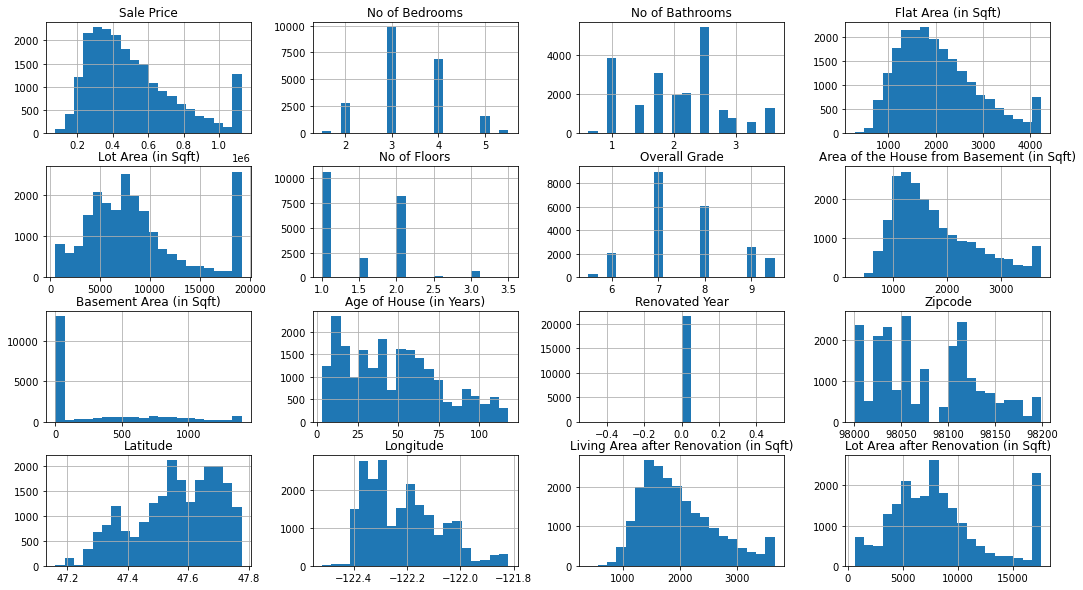

In [38]:
# Togather using df.hist()

num_df.hist(bins=20, figsize = (18,10))
plt.show()

- Check the distribution using Histogram 
 - trestbps ,chols are having Gaussian distribution(Symmetric distribution) - Standard scaling
 - thalach,oldpeak are Skewed distribution - Min-Max Scaling

In [39]:
# Excludes Sell Price Column

columns_to_exclude = ['Sale Price']
data_to_scale = num_df.drop(columns=columns_to_exclude, axis=1)

In [40]:
# Identify columns to scale
right_skewed_cols = ['Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Age of House (in Years)',
                     'Area of the House from Basement (in Sqft)', 'Age of House (in Years)']
symmetric_cols = ['Flat Area (in Sqft)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','Latitude']

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Shift the data to make it positive
shifted_data = num_df['Longitude'] - num_df['Longitude'].min() + 1

# Apply log transformation to handle right-skewness
num_df['Longitude'] = np.log1p(shifted_data)

# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    data_to_scale[col] = np.log1p(data_to_scale[col])

# Apply MinMaxScaler for skewed columns
data_to_scale[right_skewed_cols] = min_max_scaler.fit_transform(data_to_scale[right_skewed_cols])

# Apply StandardScaler for symmetric columns
data_to_scale[symmetric_cols] = standard_scaler.fit_transform(data_to_scale[symmetric_cols])

# Combine the scaled data with 'Sale Price' column
data_scaled = data_to_scale.copy()
data_scaled['Sale Price'] = num_df['Sale Price']

# Display scaled data
print("Scaling complete. Scaled data:")
print(data_scaled.head())


Scaling complete. Scaled data:
   No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0             3.0             1.00            -1.046604            0.661352   
1             3.0             2.25             0.610470            0.730212   
2             2.0             1.00            -1.535382            0.819725   
3             4.0             3.00            -0.116735            0.627452   
4             3.0             2.00            -0.450534            0.760585   

   No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  \
0           1.0            7.0                                   0.588053   
1           2.0            7.0                                   0.812408   
2           1.0            6.0                                   0.420598   
3           1.0            7.0                                   0.543153   
4           1.0            8.0                                   0.720123   

   Basement Area (in Sqft)  Age

In [41]:
data_scaled.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sale Price
0,3.0,1.00,-1.046604,0.661352,1.0,7.0,0.588053,0.000000,0.871644,0.0,98178.0,-0.352549,-122.257,-0.978599,-0.606904,221900.0
1,3.0,2.25,0.610470,0.730212,2.0,7.0,0.812408,0.827331,0.884853,0.0,98125.0,1.161620,-122.319,-0.439292,-0.151065,538000.0
2,2.0,1.00,-1.535382,0.819725,1.0,6.0,0.420598,0.000000,0.934609,0.0,98028.0,1.283591,-122.233,1.147810,-0.054122,180000.0
3,4.0,3.00,-0.116735,0.627452,1.0,7.0,0.543153,0.940593,0.833784,0.0,98136.0,-0.283264,-122.393,-0.947781,-0.755871,604000.0
4,3.0,2.00,-0.450534,0.760585,1.0,8.0,0.720123,0.000000,0.708519,0.0,98074.0,0.409588,-122.045,-0.269796,-0.182233,510000.0


In [42]:
data_scaled.shape

(21613, 16)

In [43]:
data = pd.concat([data_scaled,data_encoded],axis =1)

In [44]:
data.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sale Price,Condition_of_the_House_encoded,No_of_Times_Visited_encoded,col_No,col_Yes
0,3.0,1.00,-1.046604,0.661352,1.0,7.0,0.588053,0.000000,0.871644,0.0,98178.0,-0.352549,-122.257,-0.978599,-0.606904,221900.0,3.0,0.0,1,0
1,3.0,2.25,0.610470,0.730212,2.0,7.0,0.812408,0.827331,0.884853,0.0,98125.0,1.161620,-122.319,-0.439292,-0.151065,538000.0,3.0,0.0,1,0
2,2.0,1.00,-1.535382,0.819725,1.0,6.0,0.420598,0.000000,0.934609,0.0,98028.0,1.283591,-122.233,1.147810,-0.054122,180000.0,3.0,0.0,1,0
3,4.0,3.00,-0.116735,0.627452,1.0,7.0,0.543153,0.940593,0.833784,0.0,98136.0,-0.283264,-122.393,-0.947781,-0.755871,604000.0,4.0,0.0,1,0
4,3.0,2.00,-0.450534,0.760585,1.0,8.0,0.720123,0.000000,0.708519,0.0,98074.0,0.409588,-122.045,-0.269796,-0.182233,510000.0,3.0,0.0,1,0


In [45]:
data.shape

(21613, 20)

# Train-Test Split

In [46]:
y= data['Sale Price']
X = data.drop("Sale Price",axis = 1)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [48]:
X_train

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition_of_the_House_encoded,No_of_Times_Visited_encoded,col_No,col_Yes
6325,3.0,1.75,-0.331320,0.894526,1.0,9.0,0.741213,0.000000,0.737951,0.0,98042.0,-1.393269,-122.152,1.194036,1.099342,2.0,0.0,1,0
13473,2.0,1.00,-1.261190,0.543935,1.0,6.0,0.435964,0.732001,0.943993,0.0,98118.0,-0.058087,-122.290,-1.086460,-0.755871,3.0,0.0,1,0
17614,3.0,1.00,-1.165818,0.739404,1.5,6.0,0.520270,0.622622,0.911461,0.0,98146.0,-0.550300,-122.335,-1.240548,-0.114167,3.0,0.0,1,0
16970,3.0,2.25,0.038243,0.739922,1.0,7.0,0.618965,0.924544,0.775348,0.0,98031.0,-1.190466,-122.172,-0.269796,-0.217298,2.0,0.0,1,0
20868,2.0,2.50,-0.377814,0.282050,2.0,8.0,0.664735,0.785425,0.428146,0.0,98034.0,1.041093,-122.209,0.177058,0.494078,3.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3.0,1.50,-1.261190,0.717355,1.0,7.0,0.524191,0.000000,0.897166,0.0,98125.0,1.113986,-122.319,-1.502497,-0.309658,3.0,0.0,1,0
21575,3.0,2.50,1.226806,0.627562,2.0,8.0,0.935163,0.000000,0.101065,0.0,98023.0,-1.895586,-122.349,1.466772,-0.713931,3.0,0.0,1,0
5390,3.0,2.50,0.074007,0.614970,2.0,7.0,0.804115,0.000000,0.498315,0.0,98053.0,0.872932,-122.032,-0.439292,-1.294445,3.0,0.0,1,0
860,1.5,0.75,-2.000316,0.932204,1.0,5.5,0.122172,0.000000,0.841996,0.0,98168.0,-0.570508,-122.323,-1.240548,1.535931,3.0,0.0,1,0


In [49]:
X_test

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition_of_the_House_encoded,No_of_Times_Visited_encoded,col_No,col_Yes
735,4.0,2.25,0.014400,0.787180,2.0,8.0,0.795601,0.000000,0.716283,0.0,98058.0,-0.875074,-122.162,0.639321,-0.137085,2.0,0.0,1,0
2830,5.0,3.00,1.003876,0.709873,1.0,8.0,0.751268,0.962927,0.775348,0.0,98115.0,0.854167,-122.285,0.608504,-0.461833,4.0,0.0,1,0
4106,4.0,2.50,2.041038,0.843453,2.0,9.5,1.000000,0.000000,0.609442,0.0,98006.0,0.032850,-122.129,2.603938,0.317838,3.0,2.0,1,0
16218,3.0,3.50,2.589422,0.924858,2.0,9.5,1.000000,0.000000,0.683319,0.0,98034.0,1.006450,-122.228,2.603938,1.358545,3.0,2.0,1,0
19964,3.0,2.50,0.586627,0.647563,2.0,9.0,0.869211,0.000000,0.498315,0.0,98052.0,0.755292,-122.083,0.423598,-0.973593,3.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3.0,1.75,-0.963155,0.747582,1.0,7.0,0.609984,0.000000,0.897166,0.0,98155.0,1.459690,-122.317,-0.978599,-0.134793,2.0,0.0,1,0
20377,3.0,2.75,0.920427,0.528205,2.0,8.0,0.905340,0.000000,0.238184,0.0,98029.0,0.003981,-122.011,0.284920,-1.099413,3.0,0.0,1,0
8805,4.0,2.50,0.448339,0.591994,2.0,8.0,0.852929,0.000000,0.428146,0.0,98001.0,-1.967758,-122.283,0.707120,-0.893380,3.0,0.0,1,0
10168,4.0,1.75,0.228985,0.822705,1.0,8.0,0.825243,0.000000,0.825199,0.0,98008.0,0.232044,-122.118,0.115423,0.332735,2.0,0.0,1,0
